In [4]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd 

In [10]:
from scipy import stats

In [12]:
import seaborn as sns

In [40]:
from scipy.stats import f_oneway, kruskal

In [24]:
df_benin = pd.read_csv('data/benin_clean.csv')
df_siera = pd.read_csv('data/sierraleone_clean.csv')
df_togo = pd.read_csv('data/togo_clean.csv')

/var/folders/0d/6s2f0h9j6bs040pkv68kv4p40000gp/T/ipykernel_21175/28559090.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


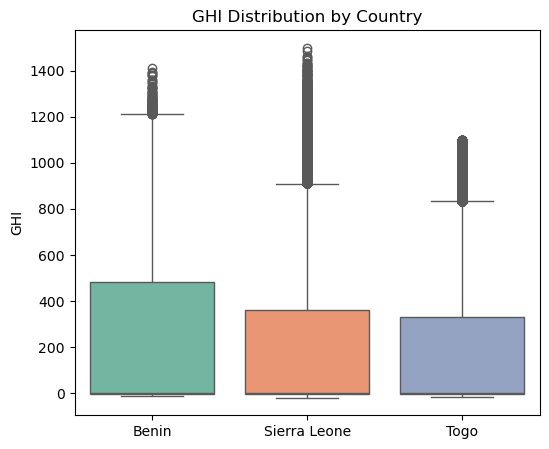

/var/folders/0d/6s2f0h9j6bs040pkv68kv4p40000gp/T/ipykernel_21175/28559090.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


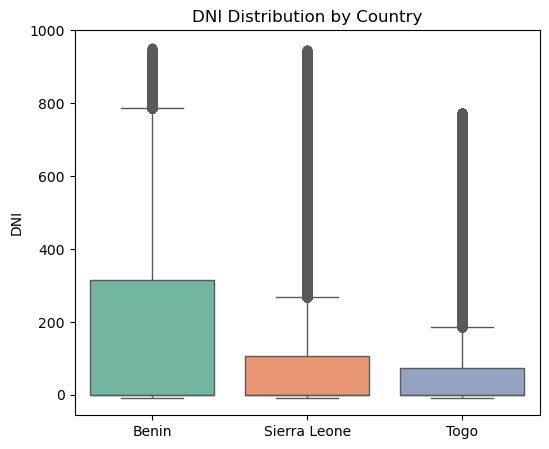

/var/folders/0d/6s2f0h9j6bs040pkv68kv4p40000gp/T/ipykernel_21175/28559090.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


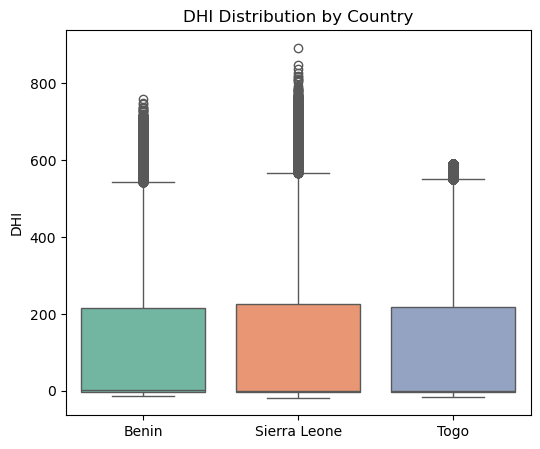

In [38]:

df_benin['Country'] = 'Benin'
df_siera['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'


df_all = pd.concat([df_benin, df_siera, df_togo], ignore_index=True)

metrics = ['GHI', 'DNI', 'DHI']

# Boxplots for each metric
for metric in metrics:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel('')
    plt.show()



In [36]:
summary_table = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
print("Summary Table:")
display(summary_table)

ghi_benin = df_benin['GHI']
ghi_siera = df_siera['GHI']
ghi_togo = df_togo['GHI']

Summary Table:


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          153.69

In [42]:
f_stat, p_val = f_oneway(ghi_benin, ghi_siera, ghi_togo)
print(f"\nANOVA Test for GHI:")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")


h_stat, p_kruskal = kruskal(ghi_benin, ghi_siera, ghi_togo)
print(f"Kruskal–Wallis Test for GHI:")
print(f"H-statistic: {h_stat:.3f}, p-value: {p_kruskal:.4f}")


ANOVA Test for GHI:
F-statistic: 4562.257, p-value: 0.0000
Kruskal–Wallis Test for GHI:
H-statistic: 6094.538, p-value: 0.0000


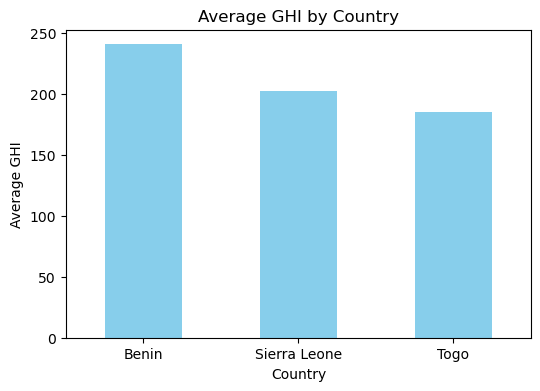

In [44]:
ghi_mean = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
ghi_mean.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=0)
plt.show()

### Key O⁠bserv​ations
- **Togo** exhibits the highest **me‌dian GHI**, su⁠gg‌e‌sting greater solar ir​radia‍nce pot⁠entia​l ove‍rall.  
- **‍Sierra Leone** s​hows the **lar⁠g⁠est va⁠riability** in GHI, indicati‍ng mor‍e i‍ncons‍istent solar ex​posure.  
- AN‌OVA re‍sults (p < 0.05) s‍ugge‌st **statis‍tica‌lly‍ significant differences** in GHI be‍tween the three countri‌es.  

